**<u>Using R & Text Analysis To Analyzing Cancer Survivor Stories</u>**

Hi there. In this page, I use the R programming language to conduct text mining/analysis on cancer survivor stories. I want to investigate the most common words in the stories. In addition, sentiment analysis is done to determine whether the stories are positive or negative.

**<u>Sections</u>**

&nbsp;

* Introduction
* Wordclouds On Most Common Words
* Word Counts In Cancer Survivor Stories - A tidyttext Approach
* Bigrams In The Cancer Survivor Stories
* Sentiment Analysis
* References / Resources

**<u>Introduction</u>**

In R, I load in the appropriate packages which allows for data cleaning, data manipulation, text mining, text analysis and plotting.

The cancer survivor stories are taken from Cancer Treatment Centers Of America (CTCA) at the website cancercenter.com. These stories are taken from the cancer survivor themselves. In the pages, there are some subheadings and titles which were not copied. Only the stories themselves are copied and pasted to a text file called `cancer_survivor_stories.txt`.

This text file is read into R with the `file()` and `readLines()` functions. Do remember to set your working directory to the folder where the text file is.

Do note that some of the pages contain more than one cancer survivor story. The types of cancers from the survivor stories do vary. Cancer types include:

&nbsp;

* Leukemia
* Breast Cancer
* Prostate Cancer
* Lung Cancer
* Stomach Cancer
* Brain Cancer
* Ovarian Cancer
* Bladder Cancer
* Melanoma
* Colorectal Cancer

&nbsp;

In [1]:
# Text Mining on Cancer Survivor Stories

# Source: Cancer Treatment Centers Of America (CTCA)
# Website: https://www.cancercenter.com/community/survivors/
# About 125 stories
# No titles but the stories from the survivors themselves. Some pages have two stories instead of one.
# Different types of cancers represented from survivors.

# 1) Wordclouds
# 2) Word Counts (Check For themes)
# 3) Bigrams (Two Word Phrases)
# 4) Sentiment Analysis - Are the stories positive or negative?

#----------------------------------

# Load libraries into R:
# Install packages with install.packages("pkg_name")

library(dplyr)
library(tidyr)
library(ggplot2)
library(tidytext)
library(wordcloud)
library(stringr)
library(tm)

# Reference: https://stackoverflow.com/questions/12626637/reading-a-text-file-in-r-line-by-line

fileName <- "cancer_survivor_stories.txt"
conn <- file(fileName, open = "r")
linn <- readLines(conn)

# Preview text (First 100 lines)
for (i in 1:100){
print(linn[i])
}
close(conn)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidytext' was built under R version 3.4.4"Loading required package: RColorBrewer
Warning message:
"package 'tm' was built under R version 3.4.2"Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Warning message in readLines(conn):
"incomplete final line found on 'cancer_survivor_stories.txt'"

[1] "I was born and raised in a small town on Long Island in New York. I live there today with my husband and three wonderful children. I work as an assistant principal in the same school district my children attend. I live a beautiful life there, taking advantage of the water and often enjoying time out on the boat."
[1] ""
[1] "One day in September 2015, I felt a lump in my left breast. I am not an alarmist, but I am also very educated and aware of what that could mean. I had an appointment scheduled in a month with my OB/GYN, so at first, I thought I would wait and talk to my doctor about it then. I had a mammogram just six months prior, so I figured that it was nothing. But I did some online research and decided that to be safe, I should schedule something sooner."
[1] ""
[1] "I have known my doctor for years, since she delivered my children. During my exam, she agreed that something wasnât right and walked me directly over to the radiology department. I stayed for the results. T

**<u>Wordclouds On Most Common Words</u>**

In this section, I use R to generate wordclouds on the most common words. The survivor_stories object is put into the `VectorSource()` function and that is put is into the `Corpus()` function.

Once you have the Corpus object, the `tm_map()` functions can be used to clean up the text. In the code below, I convert the text to lowercase, remove numbers and strip whitespace.

In [2]:
cancerStories_text <- Corpus(VectorSource(linn))



survivor_stories_clean <- tm_map(cancerStories_text, content_transformer(tolower))
survivor_stories_clean <- tm_map(survivor_stories_clean, removeNumbers)
survivor_stories_clean <- tm_map(survivor_stories_clean, stripWhitespace)

In `tm_map()`, you can remove English stopwords such as and, the, of, much, me, myself, you, etc. Add in the options removeWords and `stopwords('english')`.

From investigation of the texts, there is this weird â€™ thing which is there instead of the apostrophe in words like don't, they're and won't. This strange thing is removed in the code later below.

In [3]:
# Remove English stopwords such as: the, and or, over, under, and so on:

head(stopwords("english"), n = 15) # Sample of English stopwords

survivor_stories_clean <- tm_map(survivor_stories_clean, removeWords, stopwords('english'))

# Source: https://rstudio-pubs-static.s3.amazonaws.com/265713_cbef910aee7642dc8b62996e38d2825d.html


[1] "i"          "me"         "my"         "myself"     "we"        
 [6] "our"        "ours"       "ourselves"  "you"        "your"      
[11] "yours"      "yourself"   "yourselves" "he"         "him"

Now, the stories are converted in a term document matrix and then in a data frame.

In [4]:
# Convert to Term Document Matrix (TDM):

dtm <- TermDocumentMatrix(survivor_stories_clean)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data_frame(word = names(v),freq=v)



In [5]:
#Preview data:
head(d, n = 20)

# Check structure of data frame d:

str(d)

# Convert word column to string column:

d$word <- as.character(d$word)

word,freq
cancer,1414
ctca,1242
treatment,1068
care,695
time,615
also,441
chemotherapy,388
one,380
life,351
surgery,347


Classes 'tbl_df', 'tbl' and 'data.frame':	6711 obs. of  2 variables:
 $ word: chr  "cancer" "ctca" "treatment" "care" ...
 $ freq: num  1414 1242 1068 695 615 ...


With the use of the a for loop and the `gsub()` functions in R, I remove the `â€™` thing wherever there is one in a row of the dataframe d in the word column. The replacement for â€™ is the apostrophe ' as intended.

In [6]:
# Remove the Ã¢â¬â¢ character with the lapply function of the data frame d:

#d$word <- lapply(d$word, gsub, pattern = "â€™", replacement = "'")

# Check each row and remove Ã¢â¬â¢ in the word if there is any.
for (j in (1:nrow(d))){
  d[j, "word"] <- gsub(d[j, "word"],pattern = "â€™", replacement = "'")
}

Now that the data is cleaned up, wordclouds can be generated with the `wordcloud()` functions.

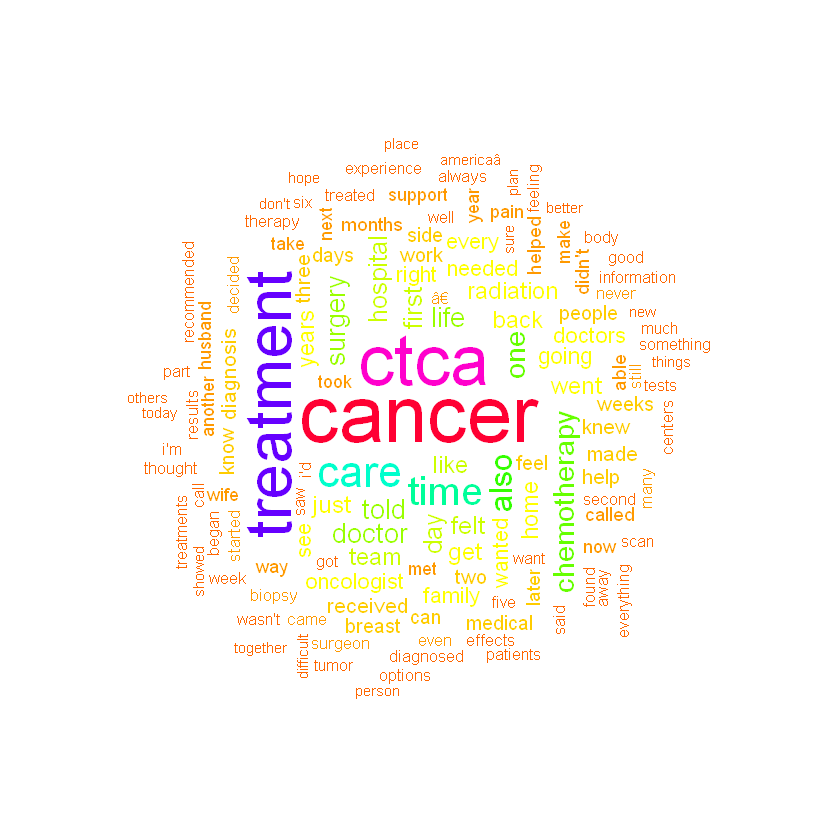

In [7]:
# Wordcloud with colours:

set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 100,
          max.words = 200, random.order=FALSE, rot.per=0.35, 
          colors = rainbow(30))


This particular wordcloud is quite big and contains a good variety of words. The most common words include cancer, treatment, ctca, care as those words are the largest in the wordcloud. (There is this â€ thing in the wordcloud which was not removed.)

To achieve a smaller wordcloud, you can raise the minimum frequency and lower the maximum words inside the wordcloud() function.

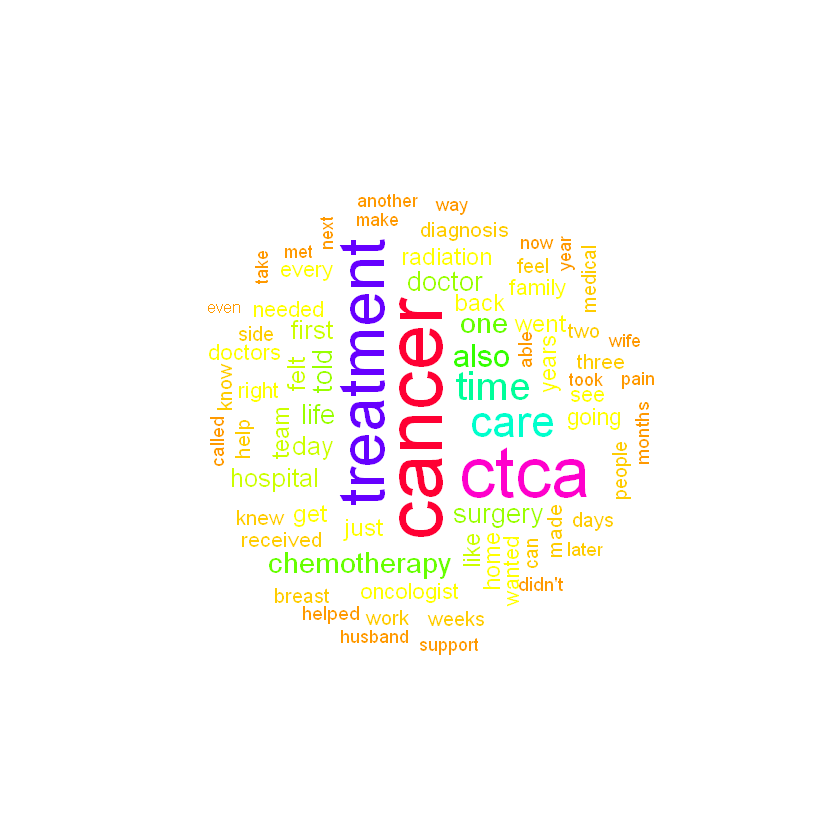

In [8]:
# Wordcloud with colours with lower max words and raise minimum frequency:

wordcloud(words = d$word, freq = d$freq, min.freq = 150,
          max.words=120, random.order=FALSE, rot.per=0.35, 
          colors = rainbow(30))

From all the `tm_map()` preprocessing and obtaining the dataframe from the term document matrix, we can display the most common words with the use of the ggplot2 package. The `mutate()` function is used to sort the words from the most common word to the least common word from the stories. Aesthetic add-on functions in ggplot2 include `labs()`, `theme()` and `geom_text()`.

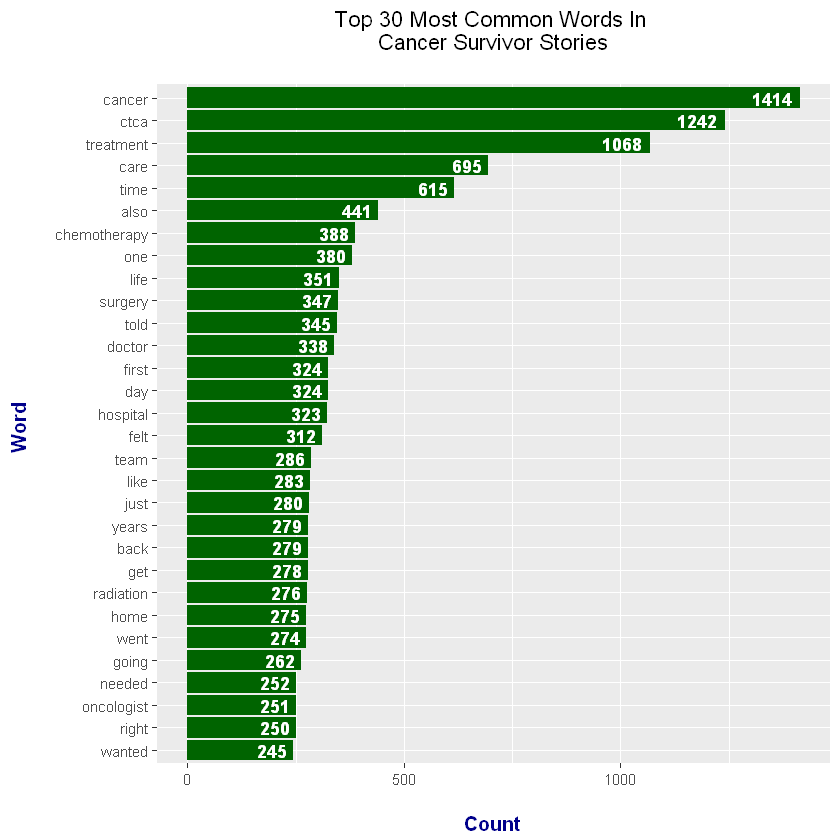

In [9]:
# ggplot2 bar plot Of Top 30 Most Common Words 
# In Cancer Survivor Stories (TDM approach):

d[1:30, ] %>% 
  mutate(word = reorder(word, freq)) %>% 
  ggplot(aes(word, freq)) + 
  geom_col(fill = "darkgreen") +
  coord_flip() +
  labs(x = "Word \n", y = "\n Count ", title = "Top 30 Most Common Words In \n Cancer Survivor Stories \n") +
  geom_text(aes(label = freq), hjust = 1.2, colour = "white", fontface = "bold", size = 3.7) +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="darkblue", size = 12),
        axis.title.y = element_text(face="bold", colour="darkblue", size = 12))